In [13]:
from value import Value, draw_dot, graph_size

# Neural Networs

In [14]:
import random

class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)
        
    def __call__(self, x):
        # return tanh(w * x + b)
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

In [15]:
n = Neuron(3)
n.w, n.b

([Value(, data=0.20903811626274793, grad=0.0),
  Value(, data=0.2197248051038987, grad=0.0),
  Value(, data=0.5345271780130407, grad=0.0)],
 Value(, data=0, grad=0.0))

In [16]:
n([1, -1, 2])

Value(, data=0.7850383108452641, grad=0.0)

In [17]:
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

In [18]:
l = Layer(5, 3)

In [19]:
l([1, -1, 2, 0, 0.9])

[Value(, data=-0.48389275774703605, grad=0.0),
 Value(, data=-0.9960060788608549, grad=0.0),
 Value(, data=0.686756396635076, grad=0.0)]

In [20]:
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs if len(outs) > 1 else outs[0]

In [21]:
l = Layer(5, 1)
l([1, -1, 2, 0, 0.9])

Value(, data=0.9976269486467044, grad=0.0)

In [22]:
class MLP:
    
    def __init__(self, nin, nout):
        sz = [nin] + nout
        self.layers = [Layer(zi, zo) for zi, zo in zip(sz, sz[1:])]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [23]:
m = MLP(3, [4, 4, 1])
inp = [-1, 0.5, 3]
m(inp)

Value(, data=0.7002280402929901, grad=0.0)

With all the available tools, lets train the network with a simple dataset:

In [24]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, -1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # targets

In [25]:
ypred = [m(x) for x in xs]
ypred

[Value(, data=0.6499752252550606, grad=0.0),
 Value(, data=0.9068059947468469, grad=0.0),
 Value(, data=0.3407749888948554, grad=0.0),
 Value(, data=0.6494694264688472, grad=0.0)]

In [26]:
[(yout-ygt)**2 for ygt, yout in zip(ys, ypred)]

[Value(, data=0.12251734293524559, grad=0.0),
 Value(, data=3.6359091016025125, grad=0.0),
 Value(, data=1.7976775708459998, grad=0.0),
 Value(, data=0.12287168298007892, grad=0.0)]

In [27]:
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(, data=5.678975698363836, grad=0.0)

In [28]:
graph_size(loss)

(398, 568)

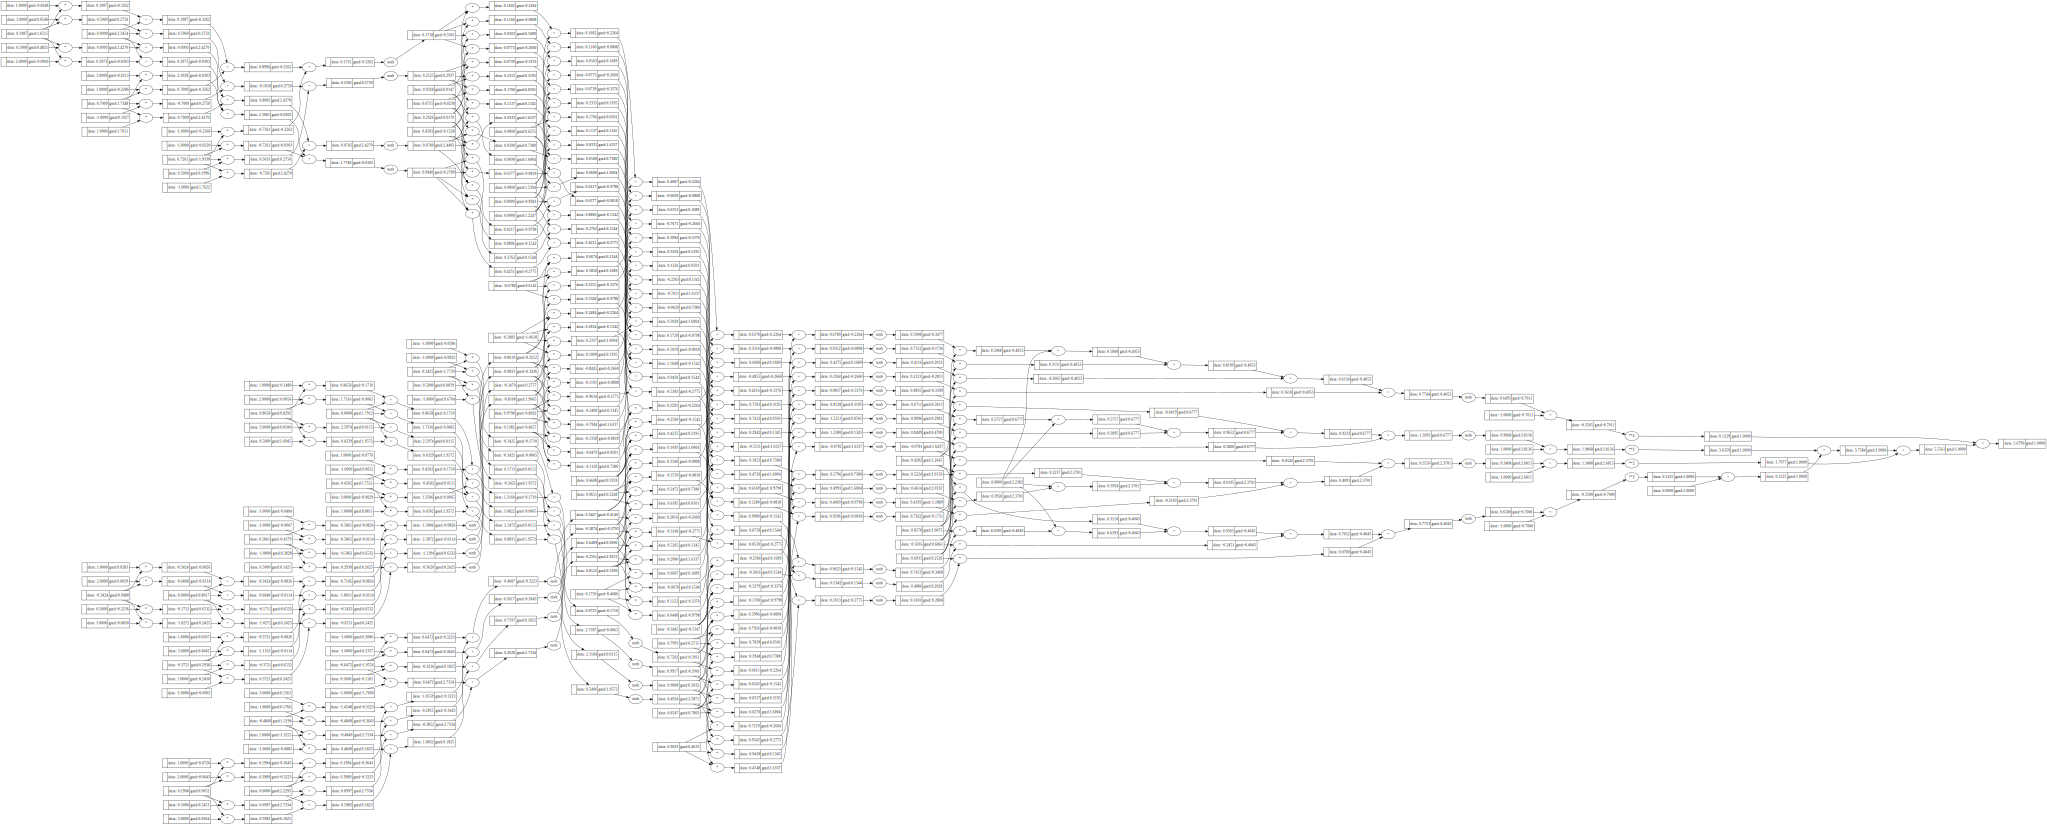

In [29]:
loss.backward()
draw_dot(loss)

In [30]:
m.layers[0].neurons[1].w[1].grad

0.29381029426890776

Remember that we want to **minimize** the loss, so we need to **substract** the gradient.

Now, we need to add a mechanisms to track which nodes contains values that can be updated, in contrast with input nodes and temporary nodes.

In [31]:
import random

class Neuron:    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
        
    def __call__(self, x):
        # return tanh(w * x + b)
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    

class Layer:    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs if len(outs) > 1 else outs[0]
    
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]
    

class MLP:    
    def __init__(self, nin, nout):
        sz = [nin] + nout
        self.layers = [Layer(zi, zo) for zi, zo in zip(sz, sz[1:])]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for l in self.layers for p in l.parameters()]


In [32]:
m = MLP(3, [4, 4, 1])
m.parameters()

[Value(, data=0.1464566384026078, grad=0.0),
 Value(, data=-0.04843564002708467, grad=0.0),
 Value(, data=-0.8154063086548353, grad=0.0),
 Value(, data=0.717591072774401, grad=0.0),
 Value(, data=0.8418941008447898, grad=0.0),
 Value(, data=0.800275315423123, grad=0.0),
 Value(, data=-0.6757998034627237, grad=0.0),
 Value(, data=0.1523733119311852, grad=0.0),
 Value(, data=0.8821140392238218, grad=0.0),
 Value(, data=-0.05477634004033782, grad=0.0),
 Value(, data=0.9450614644945867, grad=0.0),
 Value(, data=0.9846346423681307, grad=0.0),
 Value(, data=-0.7937423836283477, grad=0.0),
 Value(, data=0.1672281575596537, grad=0.0),
 Value(, data=-0.7762768158269162, grad=0.0),
 Value(, data=-0.6179298230504031, grad=0.0),
 Value(, data=0.5302688824220572, grad=0.0),
 Value(, data=-0.7633299924142811, grad=0.0),
 Value(, data=0.4209651494536313, grad=0.0),
 Value(, data=-0.18569134316318991, grad=0.0),
 Value(, data=-0.2452480240364534, grad=0.0),
 Value(, data=-0.47116523961969814, grad=0.0

In [33]:
for l in m.layers:
    print(len(l.parameters()))
print("-"*10)
print(len(m.parameters()))

16
20
5
----------
41


layer1: 3 * 4 + 4

layer2: 4 * 4 + 4

layer3: 4 * 1 + 1

In [34]:
ypred = [m(x) for x in xs]
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
print(loss)

for p in m.parameters():
    p.grad = 0
loss.backward()

learning_rate = 0.01
for p in m.parameters():
    p.data -= learning_rate * p.grad

    
ypred = [m(x) for x in xs]
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
print(loss)

Value(, data=4.23984687935939, grad=0.0)
Value(, data=4.007061630003469, grad=0.0)


What about the learning rate?

In [35]:
def test_learning_rate(learning_rate):
    m = MLP(3, [4, 4, 1])
    ypred = [m(x) for x in xs]
    loss1 = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])

    for p in m.parameters():
        p.grad = 0
    loss1.backward()

    for p in m.parameters():
        p.data -= learning_rate * p.grad
        
    ypred = [m(x) for x in xs]
    loss2 = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
    print(loss1.data, loss2.data)

In [36]:
test_learning_rate(0.01)

7.018921545884382 6.513356723736881


In [37]:
test_learning_rate(0.1)

7.261762322339298 5.879236980991886


In [38]:
test_learning_rate(1)

6.2658742562861285 7.6126707513521295


In [39]:
test_learning_rate(10)

6.184215841731117 8.0


# Example 1. Simple dataset

In [40]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

# Each sample input has one desired output that we want our MLP to predict

ys = [1.0, -1.0, -1.0, 1.0] # desired predictions

In [41]:
P = MLP(3, [4, 4, 1])

In [42]:
# Writing out the training loop

epochs = 20
learning_rate = 0.1

for i in range(epochs):

    # forward pass
    y_predicted = [P(x) for x in xs]

    # recalculate loss
    loss = sum([(y_output - y_ground_truth)**2 for y_ground_truth, y_output in zip(ys, y_predicted)])

    # backward pass
    
    # COMMON BUG: Forgetting to zero-out your gradients before
    # running the next backward pass
    
    for p in P.parameters():
        p.grad = 0
    y_predicted = [P(x) for x in xs]
    loss.backward()

    # gradient updates
    for p in P.parameters():
        p.data += -learning_rate * p.grad
        
    # print current loss
    print(f'i={i}: loss={loss}')

i=0: loss=Value(, data=6.18400478007868, grad=1.0)
i=1: loss=Value(, data=3.3228652747976293, grad=1.0)
i=2: loss=Value(, data=2.7190086482229177, grad=1.0)
i=3: loss=Value(, data=2.3891518100158455, grad=1.0)
i=4: loss=Value(, data=2.0814482107538845, grad=1.0)
i=5: loss=Value(, data=1.8344425901091277, grad=1.0)
i=6: loss=Value(, data=2.051234282286532, grad=1.0)
i=7: loss=Value(, data=3.3597072350980413, grad=1.0)
i=8: loss=Value(, data=0.8510191394327109, grad=1.0)
i=9: loss=Value(, data=0.552419221462979, grad=1.0)
i=10: loss=Value(, data=0.4140119527329521, grad=1.0)
i=11: loss=Value(, data=0.32935118962961707, grad=1.0)
i=12: loss=Value(, data=0.2815914594176146, grad=1.0)
i=13: loss=Value(, data=0.24560800438029534, grad=1.0)
i=14: loss=Value(, data=0.21708954744575376, grad=1.0)
i=15: loss=Value(, data=0.19396791312901307, grad=1.0)
i=16: loss=Value(, data=0.17488115777883986, grad=1.0)
i=17: loss=Value(, data=0.1588865416240415, grad=1.0)
i=18: loss=Value(, data=0.14531032965

In [43]:
y_predicted, ys

([Value(, data=0.8398300406706559, grad=0.0),
  Value(, data=-0.8037606522934533, grad=0.0),
  Value(, data=-0.7953546099888549, grad=0.0),
  Value(, data=0.8338238316602408, grad=0.0)],
 [1.0, -1.0, -1.0, 1.0])